In [347]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [128]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### Read all Data
Read train data and the prediction data

In [129]:
data = pd.read_csv("train.csv")
pd.set_option('display.max_columns',100)
data_predict = pd.read_csv("covtype.data" , header = None)
print ( data_predict.shape , data.shape)

(581012, 55) (15120, 56)


### Data Split

Split the data into train , develop , predict . All EDA will be done on the train data.

In [130]:

X = np.array(data.as_matrix(columns=data.columns[1:55]))
Y = np.array(data["Cover_Type"].tolist())
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
train_df = data.iloc[shuffle,:].iloc[:12000 , :]
print('data shape: ', X.shape)
print('label shape:', Y.shape)
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

data shape:  (15120, 54)
label shape: (15120,)


### EDA

#### Step 1 : Describe the train data

In [131]:
display(train_df.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7542.839917,2746.727833,156.927333,16.511667,226.822750,51.176750,1712.213583,212.734833,218.887750,134.969500,1512.127333,0.241083,0.032750,0.413917,0.312250,0.02525,0.042083,0.063083,0.05425,0.010583,0.045083,0.0,0.000083,0.000583,0.142083,0.026667,0.014833,0.031750,0.011583,0.0,0.007083,0.039250,0.004083,0.003167,0.009667,0.001083,0.02300,0.049833,0.017667,0.000083,0.003250,0.000917,0.000667,0.087000,0.048583,0.020667,0.044750,0.040250,0.001417,0.007167,0.000500,0.002333,0.047000,0.043417,0.029250,3.995250
std,4377.171265,416.529370,110.201237,8.468698,209.726723,61.406812,1329.696926,30.577063,22.850558,45.914282,1101.938162,0.427759,0.177989,0.492554,0.463431,0.15689,0.200788,0.243123,0.22652,0.102334,0.207496,0.0,0.009129,0.024146,0.349150,0.161114,0.120891,0.175341,0.107005,0.0,0.083867,0.194197,0.063773,0.056186,0.097847,0.032898,0.14991,0.217610,0.131742,0.009129,0.056918,0.030264,0.025812,0.281847,0.215004,0.142272,0.206763,0.196553,0.037614,0.084356,0.022356,0.048250,0.211648,0.203802,0.168514,1.994006
min,1.000000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3749.750000,2374.000000,65.000000,10.000000,67.000000,5.000000,758.500000,196.000000,207.000000,106.000000,726.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7524.500000,2748.000000,125.000000,15.000000,180.000000,32.000000,1307.500000,220.000000,222.000000,138.000000,1254.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Following is what we observe:
1. All fields are continous or binary. There are no text fields 
2. Soil_Type fields are binary
3. Wilderness Area fields are binary
4. Following are the fields which are continous : 'Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'

We create the scatter plots for the continous fields

#### Step 2 : Scatter plot for continous fields

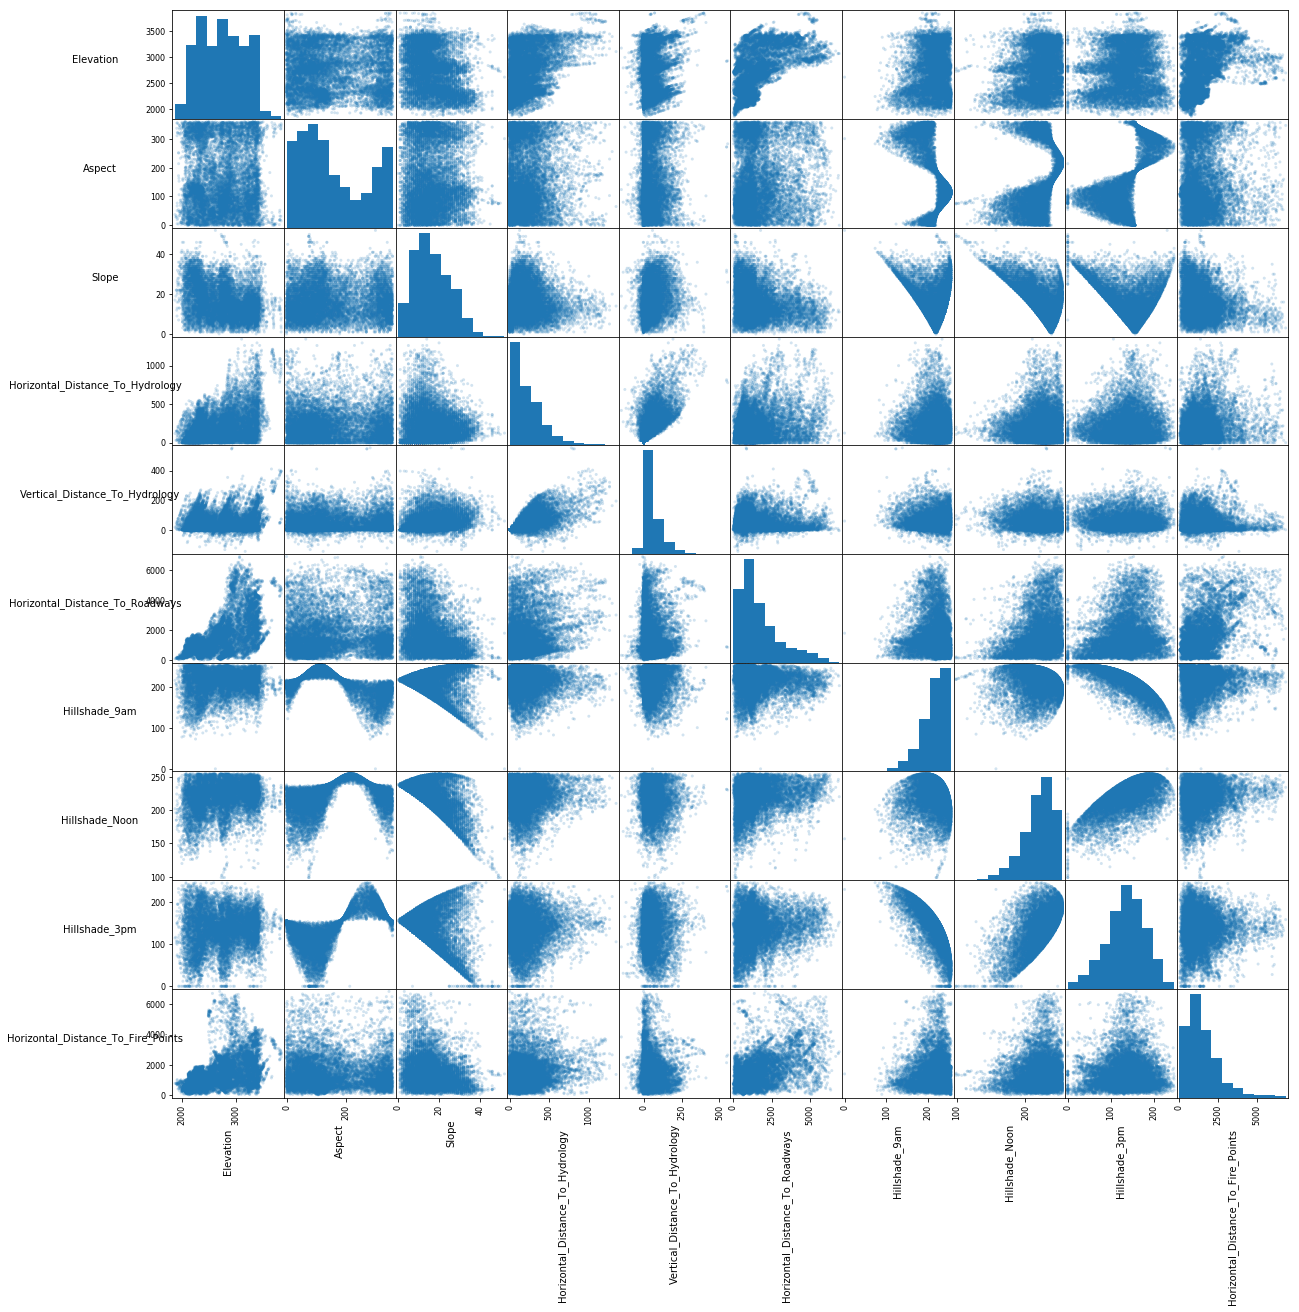

In [132]:
plot_temp = train_df[['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]
axs = pd.plotting.scatter_matrix(plot_temp,alpha=0.2,figsize=(20, 20))
n = len(plot_temp.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.show()

Followin are the observations :
1. The graph shows that there is a correlation between Hillshade_3PM , Hillshade_9AM , Hillshade_Noon , although it is not linear
2. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Aspect , although it is not linear.
3. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Slope , although it is not linear.
4. Log of Horizontal_Distance_To_Hydrology , Horizontal_Distance_To_Fire_Points , Horizontal_Distance_To_Roadways

#### Step 3 : Box Plots by Cover Type for the Continous Variables

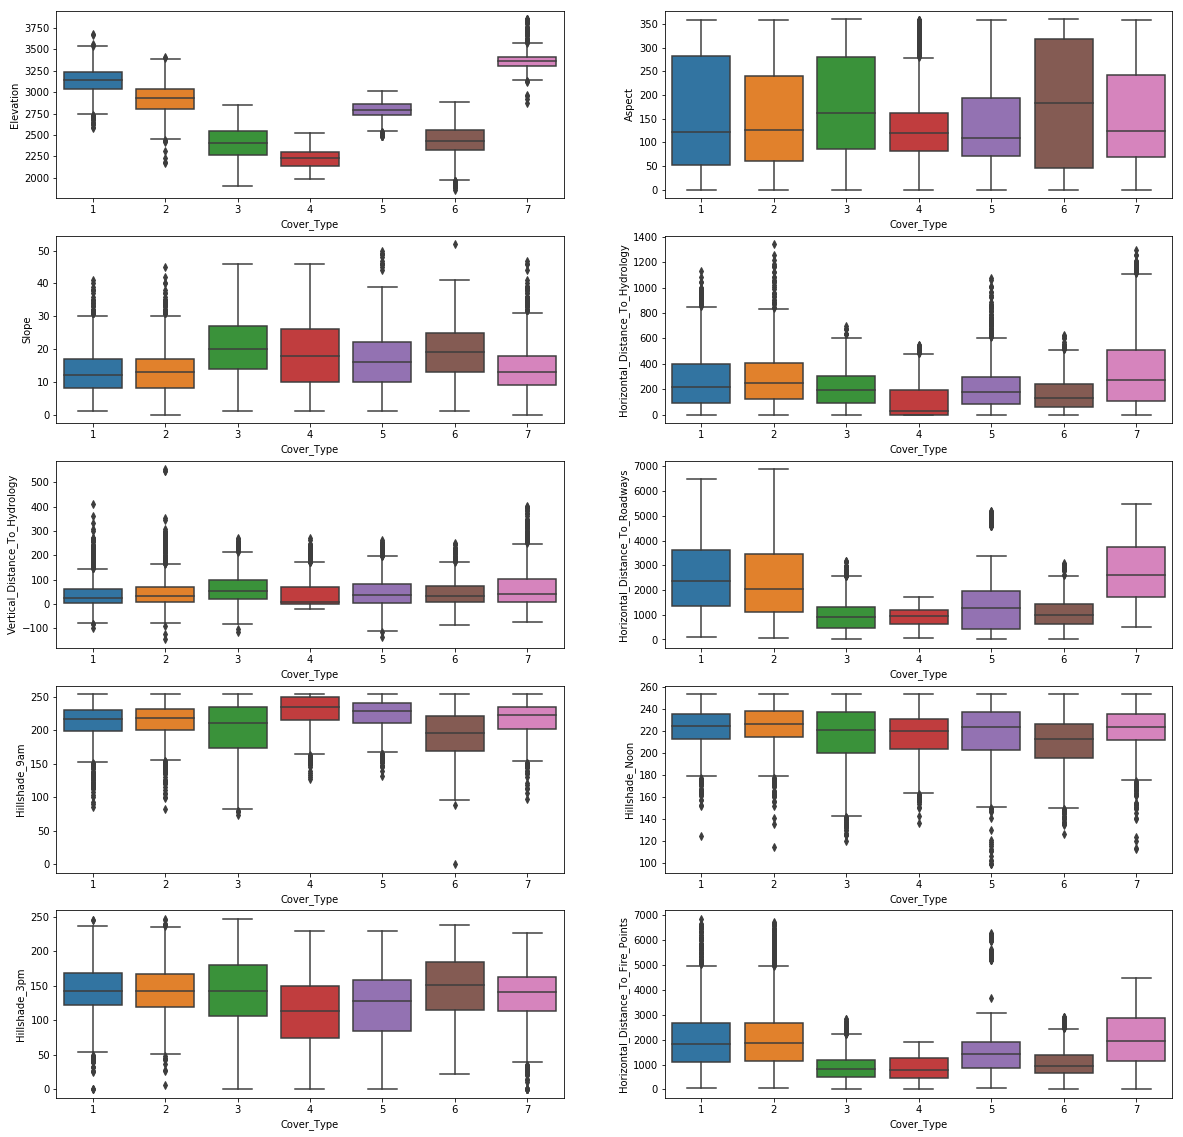

In [398]:
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(20, 20)
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points' ]
i = 0
for column_name in column_list:
    row_index = i // 2
    column_index = i % 2
    sns.boxplot(x="Cover_Type", y=column_name, data=train_df , ax=axes[row_index][column_index])
    i = i + 1  

Following are the observations :
1. Mean Elevation is highest for Cover Type 7
2. Mean Slope is lower for Cover Type 1,2 and 7
3. Mean Horizontal Distance to Roadways and Horizontal Distance to Fire Points are higher for Cover Type 1,2,7

#### Step 4 : Bar Graphs by Cover Type for Soil Type and Wilderness Area Variables

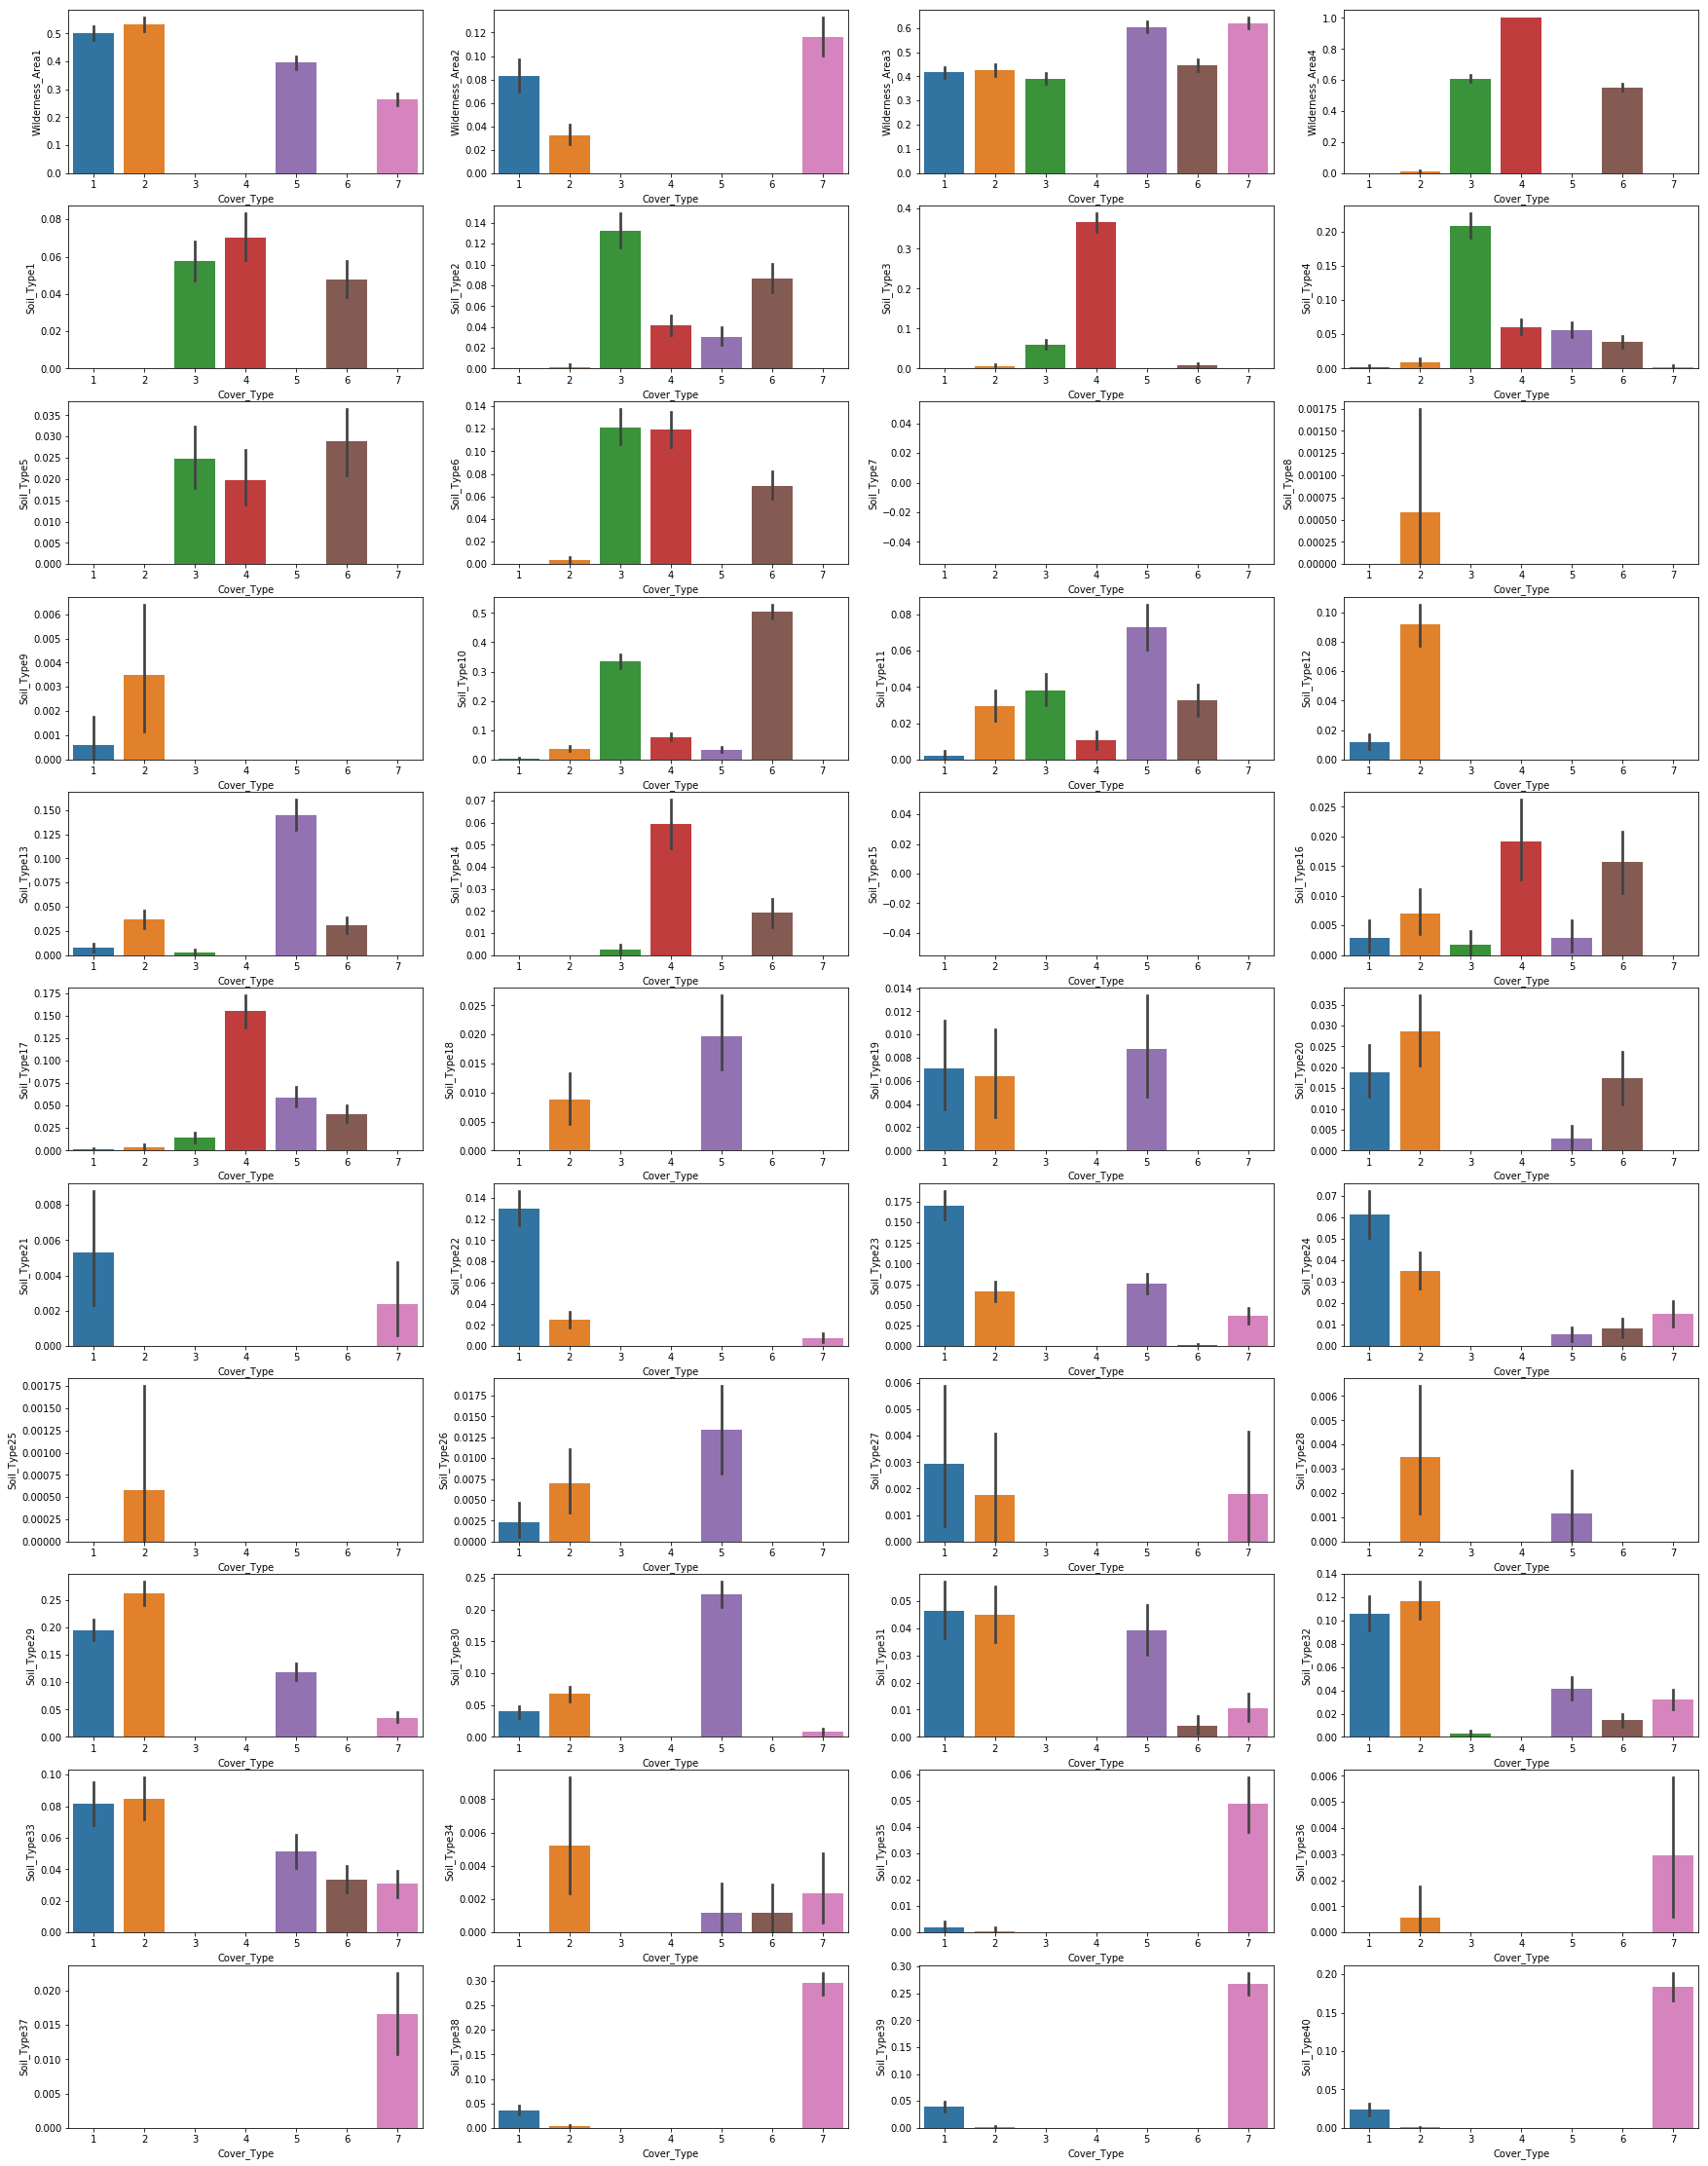

In [434]:
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points' ]
fig, axes = plt.subplots(11, 4)
fig.set_size_inches(30, 40)
i = 0
for column in train_df.columns:
    if column not in column_list and column != 'Cover_Type' and column != 'Id':
        row_index = i // 4
        column_index = i % 4
        sns.barplot(x="Cover_Type", y=column, data=train_df , ax=axes[row_index][column_index])
        i = i + 1

Following are the Observations:
1. Soil_Type_8 and Soil_Type_25 are only exists for Cover_Type 2
2. Soil_Type_37 only exists for Cover_Type 7
3. Soil_Type_40 ,  Soil_Type_39 ,  Soil_Type_38 ,  Soil_Type_36 ,  Soil_Type_35 mainly exists for Cover_Type 7
4. Wilderness_Area_2 only exists for Cover_Type 1 , 2 , 7
5. Wilderness_Area_2 mainly exists for Cover_Type 3 , 4 , 6

#### Step 5 : Count zero and NA values

In [133]:
def count_non_zero_for_a_column(train_df, column_name):
    count_obj = train_df.apply(lambda x: True if x[column_name] == 0 else False , axis=1)
    no_rows = len(count_obj[count_obj == True].index)
    print ( column_name , ' : ' , no_rows )
print ("\033[1m" , 'Count of zero rows by column :' , "\033[0;0m")
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for column_name in column_list:
    count_non_zero_for_a_column(train_df, column_name)
print ("\033[1m" , 'Count of NA rows by column :' , "\033[0;0m")    
print (train_df.count(axis = 0)   ) 

 Count of zero rows by column : 
Elevation  :  0
Aspect  :  83
Slope  :  2
Horizontal_Distance_To_Hydrology  :  1274
Vertical_Distance_To_Hydrology  :  1506
Horizontal_Distance_To_Roadways  :  2
Hillshade_9am  :  1
Hillshade_Noon  :  0
Hillshade_3pm  :  68
Horizontal_Distance_To_Fire_Points  :  2
 Count of NA rows by column : 
Id                                    12000
Elevation                             12000
Aspect                                12000
Slope                                 12000
Horizontal_Distance_To_Hydrology      12000
Vertical_Distance_To_Hydrology        12000
Horizontal_Distance_To_Roadways       12000
Hillshade_9am                         12000
Hillshade_Noon                        12000
Hillshade_3pm                         12000
Horizontal_Distance_To_Fire_Points    12000
Wilderness_Area1                      12000
Wilderness_Area2                      12000
Wilderness_Area3                      12000
Wilderness_Area4                      12000
Soil_Type1 

Following are what we observe :
1. There are no NA values in any column
2. Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology are zero for more than 10% of the data points.
    

### Solution Approaches

#### Approach 1 
1. Without transformation fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
2. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 2 
1. Tranform the train data continous features with Min Max Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 3 
1. Tranform the train data continous features with Robust Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 4 
1. Tranform the train data using PCA
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 5 
1. Tranform the train data continous features taking log for relevant fields
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

### Reusable Algorithm Code

In [134]:
warnings.filterwarnings(action='ignore')  

#### Logistic Regression

In [135]:
def classify_logistic_regression(train_data , train_labels , dev_data , dev_labels ):
    print ( "\033[1m" ,  "Logistic Regression " , "\033[0;0m" )
    C_values= { 'C' : [ 0.01, 0.05 , 0.1,  1.0,10.0]}
    grd_model = GridSearchCV( LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio =0),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Decission Tree

In [136]:
def classify_decision_tree (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Decision Tree " , "\033[0;0m" )
    C_values= { 'max_depth' : [20,25 , 35,40,50 , 60 , 80] , 'random_state' : [ 0 ,1 , 2]}
    grd_model = GridSearchCV( DecisionTreeClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Random Forest

In [300]:
def classify_random_forest (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Random Forest " , "\033[0;0m" )
    C_values= {  'n_estimators' : [ 20, 30 , 40 ,50 , 200 ]  }
    grd_model = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model 

#### KNN

In [301]:
def classify_KNN (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "K Nearest Neighbour" , "\033[0;0m" )
    C_values = { 'n_neighbors' : [1, 3, 5, 7, 9] }
    grd_model = GridSearchCV( KNeighborsClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Gradient Boosting

In [302]:
def classify_gradient_boosting(train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Gradient Boosting" , "\033[0;0m" )
    C_values= { 'max_depth' : [20,25 , 35,40,50 , 60 , 80] , 'n_estimators' : [ 10, 20 , 30 , 40 ,50 ,60]}
    grd_model = GridSearchCV( GradientBoostingClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Scale continous variables

In [140]:
def fit_all_data_scalers(column_list , scaler_type ,  train_data , test_data , dev_data ):
    for column_name in column_list:
        if scaler_type == 'MinMax' :
            scaler = MinMaxScaler(feature_range=(0, 1))
        if scaler_type == 'Robust':
            scaler = RobustScaler()
        else:
            scaler = StandardScaler()
        column_index = train_df.columns.get_loc(column_name) - 1
        train_data[:,column_index] = scaler.fit_transform(train_data[:,column_index].reshape(-1,1)).reshape(-1)
        test_data[:,column_index] =  (scaler.transform(test_data[:,column_index].reshape(-1,1)).reshape(-1))
        dev_data[:,column_index] =  (scaler.transform(dev_data[:,column_index].reshape(-1,1)).reshape(-1))
    return train_data , test_data , dev_data 

#### Run all algorithms

In [142]:
def run_all_algorithms (train_data , train_labels , dev_data , dev_labels ):
    # Run KNN
    grd_model_knn = classify_KNN(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_knn.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))
    # Run Logistic Regression
    grd_model_lr = classify_logistic_regression(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_lr.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))   
    # Run Decission Tree
    grd_model_dt = classify_decision_tree(train_data , train_labels , dev_data , dev_labels )  
    predicted = grd_model_dt.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))
    # Run Random Forest
    grd_model_rf = classify_random_forest(train_data , train_labels , dev_data , dev_labels )
    predicted = grd_model_rf.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))  
    return grd_model_knn , grd_model_lr , grd_model_dt , grd_model_rf 

#### Construct Output Display

In [155]:
def construct_single_output_display(output_display , approach_text , grd_model , dev_data , test_data):
    best_parameters = grd_model.best_params_
    predicted = grd_model.predict(dev_data)
    dev_accuracy = metrics.f1_score(dev_labels, predicted , average='micro')
    predicted = grd_model.predict(test_data)
    test_accuracy = metrics.f1_score(test_labels, predicted , average='micro')
    output_display.append([approach_text , best_parameters , dev_accuracy , test_accuracy ])
    return output_display

 ### Approach 1

In [304]:
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]
output_display = []

Run all algorithms and check accuracy on dev data . Also check the confusion matrix and accuracy per class. Validate  accuracy on test data.

In [305]:
grd_model_knn_1 , grd_model_lr_1 , grd_model_dt_1 ,   grd_model_rf_1    = run_all_algorithms (train_data , train_labels , dev_data , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.871
Classification Report :
              precision    recall  f1-score   support

           1       0.78      0.81      0.80       128
           2       0.68      0.78      0.72       120
           3       0.80      0.86      0.83       130
           4       0.96      0.91      0.93       148
           5       0.97      0.91      0.94       175
           6       0.88      0.85      0.87       128
           7       0.99      0.93      0.96       171

    accuracy                           0.87      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.88      0.87      0.87      1000

Confusion Matrix :
[[104  21   0   0   1   0   2]
 [ 19  93   5   0   2   1   0]
 [  0   6 112   3   1   8   0]
 [  0   0   9 135   0   4   0]
 [  2  10   2   0 159   2   0]
 [  0   3  12   3   1 109   0]
 [  8   4   0   0   0   0 159]]
 Logistic Regression  
Best fit parameters :
{'

In [306]:
output_display = construct_single_output_display(output_display , 'Approach 1 - KNN with no preprocessing' ,  grd_model_knn_1 , dev_data , test_data)
output_display = construct_single_output_display(output_display , 'Approach 1 - Logistic Regression with no preprocessing' ,  grd_model_lr_1 , dev_data , test_data)
output_display = construct_single_output_display(output_display , 'Approach 1 - Decission Tree with no preprocessing' ,  grd_model_dt_1 , dev_data , test_data)
output_display = construct_single_output_display(output_display , 'Approach 1 - Random Forest with no preprocessing' ,  grd_model_rf_1 , dev_data , test_data)

The accuracy is highest in KNN followed by Random Forest. F1 score is low for Class 1 and 2 . Also from the confusion matrix it is clear that the algorithms are most confused between class 1 and 2 
We run the algorithms with the top 10 important features from decision tree

In [307]:
top_10_estimators = np.argsort(grd_model_dt_1.best_estimator_.feature_importances_)[::-1][0:10]
grd_model_knn_new , grd_model_lr_new , grd_model_dt_new ,  grd_model_rf_new = run_all_algorithms (train_data[:,top_10_estimators] , train_labels , dev_data[:,top_10_estimators] , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.871
Classification Report :
              precision    recall  f1-score   support

           1       0.78      0.81      0.80       128
           2       0.68      0.78      0.72       120
           3       0.80      0.86      0.83       130
           4       0.96      0.91      0.93       148
           5       0.97      0.91      0.94       175
           6       0.88      0.85      0.87       128
           7       0.99      0.93      0.96       171

    accuracy                           0.87      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.88      0.87      0.87      1000

Confusion Matrix :
[[104  21   0   0   1   0   2]
 [ 19  93   5   0   2   1   0]
 [  0   6 112   3   1   8   0]
 [  0   0   9 135   0   4   0]
 [  2  10   2   0 159   2   0]
 [  0   3  12   3   1 109   0]
 [  8   4   0   0   0   0 159]]
 Logistic Regression  
Best fit parameters :
{'

In [308]:
output_display = construct_single_output_display(output_display , 'Approach 1.1 - KNN with top 10 important features from decision tree' ,  grd_model_knn_new , dev_data[:,top_10_estimators] , test_data[:,top_10_estimators])
output_display = construct_single_output_display(output_display , 'Approach 1.1 - Logistic Regression with top 10 important features from decision tree' ,  grd_model_lr_new , dev_data[:,top_10_estimators] , test_data[:,top_10_estimators])
output_display = construct_single_output_display(output_display , 'Approach 1.1 - Decission Tree with top 10 important features from decision tree' ,  grd_model_dt_new , dev_data[:,top_10_estimators] , test_data[:,top_10_estimators])
output_display = construct_single_output_display(output_display , 'Approach 1.1 - Random Forest with top 10 important features from decision tree' ,  grd_model_rf_new , dev_data[:,top_10_estimators] , test_data[:,top_10_estimators])

We get the highest accuracy for KNN

 ### Approach 2

Using min max scalar for the continous features

In [309]:
scaler_type = 'MinMax'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
grd_model_knn_2 , grd_model_lr_2 , grd_model_dt_2 , grd_model_rf_2   = run_all_algorithms (train_data_trans , train_labels , dev_data_trans , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.811
Classification Report :
              precision    recall  f1-score   support

           1       0.73      0.74      0.73       131
           2       0.55      0.69      0.61       109
           3       0.71      0.78      0.74       127
           4       0.94      0.89      0.92       149
           5       0.94      0.82      0.88       187
           6       0.78      0.73      0.75       133
           7       0.97      0.95      0.96       164

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.82      0.81      0.82      1000

Confusion Matrix :
[[ 97  28   0   0   2   0   4]
 [ 24  75   2   0   6   1   1]
 [  0   4  99   4   1  19   0]
 [  0   0  10 133   0   6   0]
 [  6  22   4   0 154   1   0]
 [  0   6  25   4   1  97   0]
 [  6   2   0   0   0   0 156]]
 Logistic Regression  
Best fit parameters :
{'

In [310]:
output_display = construct_single_output_display(output_display , 'Approach 2 - KNN with Min Max scalar preprocessing on continous variables' ,  grd_model_knn_2 , dev_data_trans , test_data_trans)
output_display = construct_single_output_display(output_display , 'Approach 2 - Logistic Regression with Min Max scalar preprocessing on continous variables' ,  grd_model_lr_2 , dev_data_trans , test_data_trans)
output_display = construct_single_output_display(output_display , 'Approach 2 - Decission Tree with Min Max scalar preprocessing on continous variables' ,  grd_model_dt_2 , dev_data_trans , test_data_trans)
output_display = construct_single_output_display(output_display , 'Approach 2 - Random Forest with Min Max scalar preprocessing on continous variables' ,  grd_model_rf_2 , dev_data_trans , test_data_trans)

The accuracy drops with scaling the data

 ### Approach 3

Using robust scalar for the continous features

In [311]:
scaler_type = 'Robust'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
grd_model_knn_3 , grd_model_lr_3 , grd_model_dt_3 ,  grd_model_rf_3    = run_all_algorithms (train_data_trans , train_labels , dev_data_trans , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.803
Classification Report :
              precision    recall  f1-score   support

           1       0.73      0.73      0.73       132
           2       0.54      0.65      0.59       113
           3       0.69      0.76      0.72       128
           4       0.94      0.91      0.93       146
           5       0.93      0.82      0.87       186
           6       0.77      0.71      0.74       133
           7       0.96      0.96      0.96       162

    accuracy                           0.80      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.81      0.80      0.81      1000

Confusion Matrix :
[[ 97  29   0   0   2   0   4]
 [ 25  74   2   0   8   2   2]
 [  0   5  97   4   1  21   0]
 [  0   0   9 133   0   4   0]
 [  6  22   4   0 152   2   0]
 [  0   5  28   4   1  95   0]
 [  5   2   0   0   0   0 155]]
 Logistic Regression  
Best fit parameters :
{'

In [312]:
output_display = construct_single_output_display(output_display , 'Approach 3 - KNN with Robust scalar preprocessing on continous variables' ,  grd_model_knn_3 , dev_data_trans , test_data_trans)
output_display = construct_single_output_display(output_display , 'Approach 3 - Logistic Regression with Robust scalar preprocessing on continous variables' ,  grd_model_lr_3 , dev_data_trans , test_data_trans)
output_display = construct_single_output_display(output_display , 'Approach 3 - Decission Tree with Robust scalar preprocessing on continous variables' ,  grd_model_dt_3 , dev_data_trans , test_data_trans)
output_display = construct_single_output_display(output_display , 'Approach 3 - Random Forest with Robust scalar preprocessing on continous variables' ,  grd_model_rf_3 , dev_data_trans , test_data_trans)

The accuracy drops with scaling the data

 ### Approach 4

Fit PCA on train data and fit model on the PCA

In [313]:
pca = PCA(n_components=50)
pca.fit(train_data)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,7.243888e-01,0.724389
1,2,2.236750e-01,0.948064
2,3,3.547524e-02,0.983539
3,4,1.107175e-02,0.994611
4,5,4.117122e-03,0.998728
5,6,6.479662e-04,0.999376
6,7,4.288701e-04,0.999805
7,8,1.820725e-04,0.999987
8,9,1.195947e-05,0.999999
9,10,8.069952e-07,1.000000


First 10 components explains 100% of the variance . Hence we fit the PCA for 10 components

In [314]:
pca = PCA(n_components=10)
pca.fit(train_data)
train_pca = pca.transform(train_data)
dev_pca = pca.transform(dev_data)
test_pca = pca.transform(test_data)
grd_model_knn_4 , grd_model_lr_4 , grd_model_dt_4 , grd_model_rf_4   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.871
Classification Report :
              precision    recall  f1-score   support

           1       0.78      0.81      0.80       128
           2       0.68      0.78      0.72       120
           3       0.80      0.86      0.83       130
           4       0.96      0.91      0.93       148
           5       0.97      0.91      0.94       175
           6       0.88      0.85      0.87       128
           7       0.99      0.93      0.96       171

    accuracy                           0.87      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.88      0.87      0.87      1000

Confusion Matrix :
[[104  21   0   0   1   0   2]
 [ 19  93   5   0   2   1   0]
 [  0   6 112   3   1   8   0]
 [  0   0   9 135   0   4   0]
 [  2  10   2   0 159   2   0]
 [  0   3  12   3   1 109   0]
 [  8   4   0   0   0   0 159]]
 Logistic Regression  
Best fit parameters :
{'

In [315]:
output_display = construct_single_output_display(output_display , 'Approach 4 - KNN with 10 PCA components' ,  grd_model_knn_4 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 4 - Logistic Regression with 10 PCA components' ,  grd_model_lr_4 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 4 - Decission Tree with 10 PCA components' ,  grd_model_dt_4 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 4 - Random Forest with 10 PCA components' ,  grd_model_rf_4 , dev_pca , test_pca)

Accuracy drops with PCA

 ### Approach 5

Scale the variable use MinMax scaler , run PCA and fit model on the PCA

In [317]:
scaler_type = 'MinMax'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
pca = PCA(n_components=50)
pca.fit(train_data_trans)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,0.253877,0.253877
1,2,0.207421,0.461298
2,3,0.157695,0.618993
3,4,0.095700,0.714692
4,5,0.051422,0.766115
5,6,0.043299,0.809414
6,7,0.038497,0.847911
7,8,0.028145,0.876057
8,9,0.022471,0.898528
9,10,0.021240,0.919768


In [318]:
pca = PCA(n_components=15)
pca.fit(train_data_trans)
train_pca = pca.transform(train_data_trans)
dev_pca = pca.transform(dev_data_trans)
test_pca = pca.transform(test_data_trans)
grd_model_knn_5 , grd_model_lr_5 , grd_model_dt_5 , grd_model_rf_5   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.799
Classification Report :
              precision    recall  f1-score   support

           1       0.71      0.71      0.71       132
           2       0.56      0.64      0.60       120
           3       0.71      0.77      0.74       129
           4       0.94      0.90      0.92       147
           5       0.91      0.86      0.89       174
           6       0.75      0.71      0.73       131
           7       0.95      0.92      0.93       167

    accuracy                           0.80      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.81      0.80      0.80      1000

Confusion Matrix :
[[ 94  31   0   0   0   0   7]
 [ 27  77   3   0  11   1   1]
 [  0   3  99   3   2  22   0]
 [  0   0   8 133   0   6   0]
 [  1  18   3   0 150   2   0]
 [  0   5  27   5   1  93   0]
 [ 11   3   0   0   0   0 153]]
 Logistic Regression  
Best fit parameters :
{'

In [319]:
output_display = construct_single_output_display(output_display , 'Approach 5 - KNN with Min Max scaler and 15 PCA components' ,  grd_model_knn_5 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 5 - Logistic Regression with Min Max scaler and 15 PCA components' ,  grd_model_lr_5 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 5 - Decission Tree with Min Max scaler and 15 PCA components' ,  grd_model_dt_5 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 5 - Random Forest with Min Max scaler and 15 PCA components' ,  grd_model_rf_5 , dev_pca , test_pca)

 ### Approach 6

Scale the variable use Robust scaler , run PCA and fit model on the PCA

In [320]:
scaler_type = 'Robust'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
pca = PCA(n_components=50)
pca.fit(train_data_trans)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,0.239927,0.239927
1,2,0.177978,0.417905
2,3,0.158036,0.575942
3,4,0.098819,0.674761
4,5,0.055511,0.730272
5,6,0.047186,0.777458
6,7,0.034264,0.811722
7,8,0.029058,0.840779
8,9,0.022279,0.863059
9,10,0.017687,0.880746


In [321]:
pca = PCA(n_components=20)
pca.fit(train_data_trans)
train_pca = pca.transform(train_data_trans)
dev_pca = pca.transform(dev_data_trans)
test_pca = pca.transform(test_data_trans)
grd_model_knn_6 , grd_model_lr_6 , grd_model_dt_6 , grd_model_rf_6   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.799
Classification Report :
              precision    recall  f1-score   support

           1       0.70      0.73      0.71       128
           2       0.55      0.61      0.58       124
           3       0.70      0.73      0.72       134
           4       0.95      0.92      0.93       146
           5       0.91      0.85      0.88       177
           6       0.76      0.73      0.75       128
           7       0.96      0.94      0.95       163

    accuracy                           0.80      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.81      0.80      0.80      1000

Confusion Matrix :
[[ 93  29   0   0   2   0   4]
 [ 30  76   3   0  10   2   3]
 [  0   8  98   4   1  23   0]
 [  0   0   9 134   0   3   0]
 [  3  18   4   0 150   2   0]
 [  0   4  26   3   1  94   0]
 [  7   2   0   0   0   0 154]]
 Logistic Regression  
Best fit parameters :
{'

In [322]:
output_display = construct_single_output_display(output_display , 'Approach 6 - KNN with Robust scaler and 20 PCA components' ,  grd_model_knn_6 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 6 - Logistic Regression with Robust scaler and 20 PCA components' ,  grd_model_lr_6 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 6 - Decission Tree with Robust scaler and 20 PCA components' ,  grd_model_dt_6 , dev_pca , test_pca)
output_display = construct_single_output_display(output_display , 'Approach 6 - Random Forest with Robust scaler and 20 PCA components' ,  grd_model_rf_6 , dev_pca , test_pca)

### Approach 7

First classify the output between two classes . Class 0 with covertype 1,2 . Class 1 with covertype with rest. Have 2 more models 2 classify to exact cover type. 

In [323]:
#Prepare train and dev data for model 1 
train_labels_ens_1 = np.where(train_labels> 2 , 1 , 0)
dev_labels_ens_1 = np.where(dev_labels> 2 , 1 , 0)
grd_model_rf_7_1 = classify_random_forest(train_data , train_labels_ens_1 , dev_data , dev_labels_ens_1 )


 Random Forest  
Best fit parameters :
{'n_estimators': 200}
Best fit model F1 score :
0.956


In [324]:
# Train model 2 
train_labels_ens_2 = train_labels[np.where(train_labels <= 2)]
train_data_ens_2 = train_data[np.where(train_labels <= 2)]
C_values= {  'n_estimators' : [ 20, 30 , 40 ,50 , 200 ]  }
grd_model_7_2 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_7_2.fit(train_data_ens_2,train_labels_ens_2)
print ("Best fit parameters :")
print (grd_model_7_2.best_params_)

Best fit parameters :
{'n_estimators': 40}


In [325]:
# Train model 3
train_labels_ens_3 = train_labels[np.where(train_labels > 2)]
train_data_ens_3 = train_data[np.where(train_labels > 2)]
C_values= {  'n_estimators' : [ 20, 30 , 40 ,50 , 200 ]  }
grd_model_7_3 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_7_3.fit(train_data_ens_3,train_labels_ens_3)
print ("Best fit parameters :")
print (grd_model_7_3.best_params_)

Best fit parameters :
{'n_estimators': 200}


In [326]:
def predict_approach_ensemble_7(data , labels):
    predicted_1 = grd_model_rf_7_1.predict(data)
    predicted_2 = grd_model_7_2.predict(data)
    predicted_3 = grd_model_7_3.predict(data)
    predicted_final = np.empty(labels.size , dtype=int)
    for i in range(labels.size):
        if predicted_1[i] == 0:
            predicted_final[i] = predicted_2[i]
        else:
            predicted_final[i] = predicted_3[i]
    return predicted_final        

In [327]:
predicted = predict_approach_ensemble_7(dev_data , dev_labels)
print ("Best fit model F1 score :")
print(metrics.f1_score(dev_labels, predicted , average='micro'))         

Best fit model F1 score :
0.87


In [328]:
best_parameters = grd_model_rf_7_1.best_params_
predicted = predict_approach_ensemble_7(dev_data , dev_labels)
dev_accuracy = metrics.f1_score(dev_labels, predicted , average='micro')
predicted = predict_approach_ensemble_7(test_data , test_labels)
test_accuracy = metrics.f1_score(test_labels, predicted , average='micro')
approach_text = 'Approach 7 Ensemble model to classify between 1 and 2 covertype and rest , separate models to classify 1 ,2 and 3,4,5,6,7 '
output_display.append([approach_text , best_parameters , dev_accuracy , test_accuracy ])

### Approach 8

First classify the output into 6 classes 0 ,  3 , 4 , 5 , 6 , 7. 0 is a combined class for 1 and 2. Have a separate model to classify 1 and 2 covertypes. In case the first model predicts 0 , then use the second model to further classify it as 1 or 2.

In [329]:
#Prepare train and dev data for model 1 
train_labels_ens_1 = np.where(train_labels> 2 , train_labels , 0 )
dev_labels_ens_1 = np.where(dev_labels> 2 , dev_labels , 0)
np.unique(train_labels_ens_1)
grd_model_rf_8_1 = classify_random_forest(train_data , train_labels_ens_1 , dev_data , dev_labels_ens_1 )

 Random Forest  
Best fit parameters :
{'n_estimators': 200}
Best fit model F1 score :
0.914


In [330]:
# Train model 2 
train_labels_ens_2 = train_labels[np.where(train_labels <= 2)]
train_data_ens_2 = train_data[np.where(train_labels <= 2)]
C_values= {  'n_estimators' : [ 20, 30 , 40 ,50 , 200 ]  }  
grd_model_8_2 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_8_2.fit(train_data_ens_2,train_labels_ens_2)
print ("Best fit parameters :")
print (grd_model_8_2.best_params_)

Best fit parameters :
{'n_estimators': 40}


In [331]:
def predict_approach_ensemble_8(data , labels):
    predicted_1 = grd_model_rf_8_1.predict(data)
    predicted_2 = grd_model_8_2.predict(data)
    predicted_final = predicted_1
    for i in range(predicted_1.size):
        if predicted_1[i] == 0:
            predicted_final[i] = predicted_2[i]
    return predicted_final     

In [332]:
predicted = predict_approach_ensemble_8(dev_data , dev_labels)
print ("Best fit model F1 score :")
print(metrics.f1_score(dev_labels, predicted , average='micro'))           

Best fit model F1 score :
0.871


In [333]:
best_parameters = grd_model_rf_8_1.best_params_
predicted = predict_approach_ensemble_8(dev_data , dev_labels)
dev_accuracy = metrics.f1_score(dev_labels, predicted , average='micro')
predicted = predict_approach_ensemble_8(test_data , test_labels)
test_accuracy = metrics.f1_score(test_labels, predicted , average='micro')
approach_text = 'Approach 8 Ensemble model to combine 1 and 2 into a single class 0 , then a model to predict between 1 and 2  '
output_display.append([approach_text , best_parameters , dev_accuracy , test_accuracy ])

### Approach 9

Neural network with Python scikit learn

In [334]:
param_values= { 'solver' : [ 'sgd' , 'adam' , 'lbfgs' ] , 'activation' : [ 'identity', 'logistic', 'tanh', 'relu' ]   }
grd_model_9 = GridSearchCV( MLPClassifier(hidden_layer_sizes=(30,), random_state=0),  param_grid = param_values ,return_train_score = 1)
grd_model_9.fit(train_data , train_labels)
print ("Best fit parameters :")
print (grd_model_9.best_params_)
predicted = grd_model_9.predict(dev_data)
print ("Best fit model F1 score :" )
print(metrics.f1_score(dev_labels, predicted , average='micro'))   

Best fit parameters :
{'activation': 'relu', 'solver': 'adam'}
Best fit model F1 score :
0.618


In [335]:
best_parameters = grd_model_9.best_params_
predicted = grd_model_9.predict(dev_data)
dev_accuracy = metrics.f1_score(dev_labels, predicted , average='micro')
predicted = grd_model_9.predict(test_data)
test_accuracy = metrics.f1_score(test_labels, predicted , average='micro')
approach_text = 'Approach 9 Neural Network Model'
output_display.append([approach_text , best_parameters , dev_accuracy , test_accuracy ])

In [336]:
df_output = pd.DataFrame(output_display, columns = ['Approach', 'Best_fit_parameters' , 'Dev_accuracy' , 'Test_accuracy'])
pd.set_option('display.max_colwidth', 120)
display(df_output.sort_values(by='Test_accuracy', ascending=False))

,Approach,Best_fit_parameters,Dev_accuracy,Test_accuracy
15,Approach 3 - Random Forest with Robust scalar preprocessing on continous variables,{'n_estimators': 200},0.890,0.861792
3,Approach 1 - Random Forest with no preprocessing,{'n_estimators': 200},0.889,0.861792
11,Approach 2 - Random Forest with Min Max scalar preprocessing on continous variables,{'n_estimators': 200},0.889,0.861321
29,"Approach 8 Ensemble model to combine 1 and 2 into a single class 0 , then a model to predict between 1 and 2",{'n_estimators': 200},0.871,0.858962
28,"Approach 7 Ensemble model to classify between 1 and 2 covertype and rest , separate models to classify 1 ,2 and 3,4,...",{'n_estimators': 200},0.870,0.855660
19,Approach 4 - Random Forest with 10 PCA components,{'n_estimators': 200},0.859,0.840566
7,Approach 1.1 - Random Forest with top 10 important features from decision tree,{'n_estimators': 200},0.861,0.836792
23,Approach 5 - Random Forest with Min Max scaler and 15 PCA components,{'n_estimators': 200},0.847,0.835849
16,Approach 4 - KNN with 10 PCA components,{'n_neighbors': 1},0.871,0.835377
0,Approach 1 - KNN with no preprocessing,{'n_neighbors': 1},0.871,0.835377


### Predictions on full data set with the top performing models

In [337]:
data_predict = pd.read_csv("covtype.data" , header = None)
print ( data_predict.shape , data.shape)
predict_data = np.array(data_predict.as_matrix(columns=data_predict.columns[0:54]))
predict_labels = np.array(data_predict.as_matrix(columns=data_predict.columns[54]))

(581012, 55) (15120, 56)


In [339]:
print ( "\033[1m" ,  "Approach 3 - Random Forest with Robust scalar preprocessing on continous variables : " , "\033[0;0m" )
scaler_type = 'Robust'
train_data_trans , predict_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(predict_data)) , np.copy(np.float32(dev_data)) )
predicted= grd_model_rf_3.predict(predict_data_trans)
print(metrics.f1_score(predict_labels, predicted , average='micro'))

 Approach 3 - Random Forest with Robust scalar preprocessing on continous variables :  
0.7609670712480981


In [340]:
print ( "\033[1m" ,  "Approach 1 - Random Forest with no preprocessing : " , "\033[0;0m" )
predicted= grd_model_rf_1.predict(predict_data)
print(metrics.f1_score(predict_labels, predicted , average='micro'))

 Approach 1 - Random Forest with no preprocessing :  
0.7610169841586749


In [341]:
print ( "\033[1m" ,  "Approach 2 - Random Forest with Min Max scalar preprocessing on continous variables : " , "\033[0;0m" )
scaler_type = 'MinMax'
train_data_trans , predict_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(predict_data)) , np.copy(np.float32(dev_data)) )
predicted= grd_model_rf_2.predict(predict_data_trans)
print(metrics.f1_score(predict_labels, predicted , average='micro'))

 Approach 2 - Random Forest with Min Max scalar preprocessing on continous variables :  
0.7609378119556911


In [342]:
print ( "\033[1m" ,  "Approach 8 - Ensemble model to combine 1 and 2 into a single class 0 , then a model to predict between 1 and 2 : " , "\033[0;0m" )
predicted = predict_approach_ensemble_8(predict_data , predict_labels)
print(metrics.f1_score(predict_labels, predicted , average='micro'))

 Approach 8 - Ensemble model to combine 1 and 2 into a single class 0 , then a model to predict between 1 and 2 :  
0.7604558941983988


### Submission Data Prep

In [346]:
data_predict = pd.read_csv("test.csv")
predict_data = np.array(data_predict.as_matrix(columns=data.columns[1:55]))
predicted = predict_approach_ensemble_8(predict_data , predict_labels)
predicted= grd_model_rf_3.predict(predict_data_trans)
df_predicted = pd.DataFrame()
df_predicted['Id'] = data_predict['Id']
df_predicted['Cover_Type'] = predicted
export_csv = df_predicted.to_csv('submission.csv' , header=True , index = None)

Action Items :

1. GMM - Clustering - Jeff
2. Ensemble Models Binary Classification between category 1-2 and rest. Then individual models to segregate the classes -  Sudipto (Done)
3. XgBoost - Karthik
4. Preprocessing PCA with scalar transform - Sudipto (Done)
5. Subset selection by L1 regularization - Jeff
6. Neural Net - Karthik / Jeff / Sudipto - Added the Scikit learn part (Sudipto)
7. More parameter tuning - Karthik
8. Majority vote ensemble - Karthik
9. SVM - Jeff
10. Confusion between 1 and 2 with data - All
11. Variation of 2 with 2 models instead of 3 - Sudipto